In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [228]:
df= pd.read_csv("kc_house_data.csv")

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [230]:
df.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [231]:
dat= pd.to_datetime(df.iloc[0,1])
dat

Timestamp('2014-10-13 00:00:00')

In [232]:
df.head(4).T

,0,1,2,3
id,7129300520,6414100192,5631500400,2487200875
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000
price,221900,538000,180000,604000
bedrooms,3,3,2,4
bathrooms,1,2.25,1,3
sqft_living,1180,2570,770,1960
sqft_lot,5650,7242,10000,5000
floors,1,2,1,1
waterfront,0,0,0,0
view,0,0,0,0


In [233]:
df.isna().any().any()

False

In [234]:
catdf=df.loc[:,['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]
catdf.head(3)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,3,1.00,1.0,0,0,3,7
1,3,2.25,2.0,0,0,3,7
2,2,1.00,1.0,0,0,3,6


In [235]:
for g in catdf:
    v=catdf[g].unique()
    v.sort()
    print("unique values in {a} is {b}".format(a=g, b=v))
    cor= spearmanr(df.price, df[g])
    print("correlation value is  %.3f "%cor.correlation)
    

unique values in bedrooms is [ 0  1  2  3  4  5  6  7  8  9 10 11 33]
correlation value is  0.345 
unique values in bathrooms is [0.   0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5
 7.75 8.  ]
correlation value is  0.497 
unique values in floors is [1.  1.5 2.  2.5 3.  3.5]
correlation value is  0.322 
unique values in waterfront is [0 1]
correlation value is  0.115 
unique values in view is [0 1 2 3 4]
correlation value is  0.294 
unique values in condition is [1 2 3 4 5]
correlation value is  0.018 
unique values in grade is [ 1  3  4  5  6  7  8  9 10 11 12 13]
correlation value is  0.658 


Check correlation between ordinal and continous

Ordinal: Grade, Condition, View

In [236]:
kendalltau(catdf.grade, df.price)

KendalltauResult(correlation=0.5278343591543846, pvalue=0.0)

In [237]:
kendalltau(catdf.condition, df.price)

KendalltauResult(correlation=0.014481450319766677, pvalue=0.007147098254168895)

In [238]:
kendalltau(catdf.view, df.price)

KendalltauResult(correlation=0.237572748970764, pvalue=0.0)

Check correlation among the categorical variables

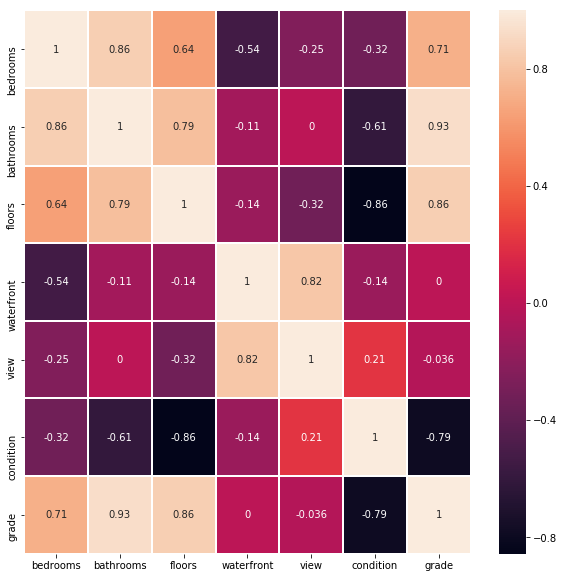

In [239]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(spearmanr(catdf.corr()).correlation,annot=True, ax=ax, linewidths=1, xticklabels=catdf.columns, yticklabels=catdf.columns)
#spearmanr(catdf)

Grade is highly correlated to Bedrooms, Bathrooms, Floors. 
It has almost 0 impact about waterfront and View
When condition is worst, grade is less
View is highly correlated to waterfront . View is given higher rank, when it is water front.
Floor is highly correlated to grade. When number of floor increases grade also increases.
Floor is also related to bathrooms and bedrooms :(
When number of floors are higher, it is ranked as good condition
    

In [240]:
condf= df.loc[:,['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]

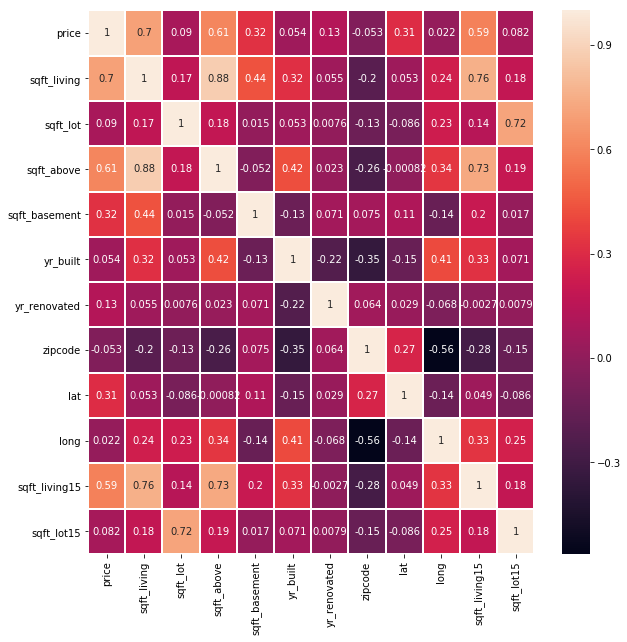

In [241]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(condf.corr(),annot=True, ax=ax, linewidths=1)

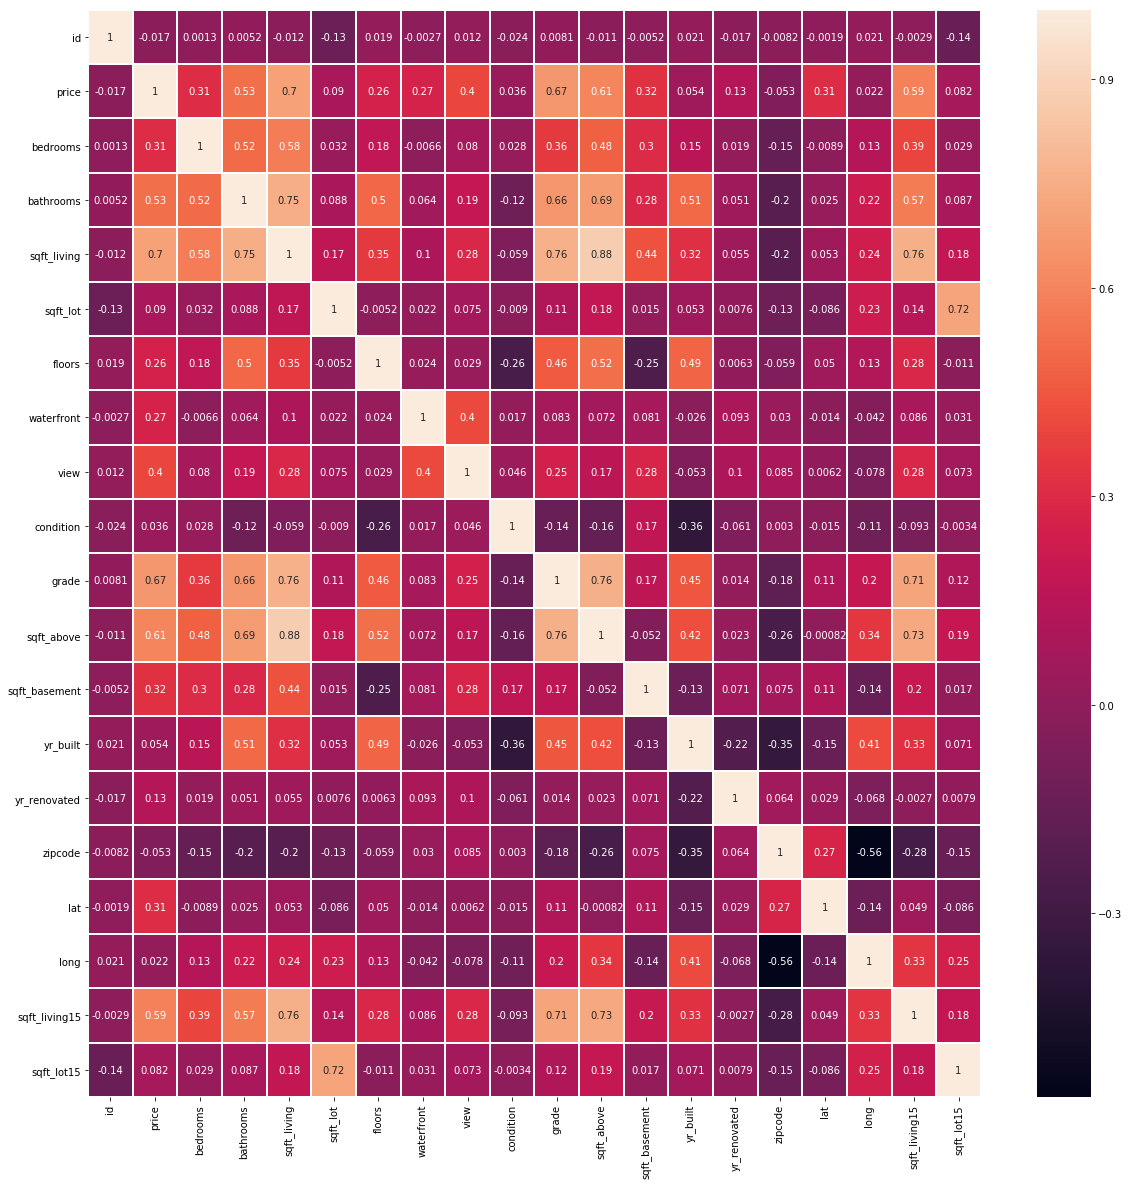

In [252]:
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, ax=ax, linewidths=1)

# LINEAR REGRESSION BASED ON ANALSIS OF FEATURES

In [324]:
x= df[['condition','view','bedrooms','bathrooms','floors','sqft_lot','sqft_living','sqft_basement','yr_built','zipcode']]

In [325]:
y = df[['price']]

In [326]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
reg= LinearRegression()
reg.fit(x_train, y_train)
y_predict= reg.predict(x_test)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))

0.591597568243263
0.5683823063516016


# LINEAR REGRESSION

In [275]:
x = df.drop(['price','date','id'], axis = 1)
y = df[['price']]

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [277]:
reg= LinearRegression()

In [278]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [279]:
y_predict= reg.predict(x_test)

In [280]:
print(reg.score(x_train, y_train))

0.6988735996600892


In [281]:
print(reg.score(x_test, y_test))

0.7008855143850599


# Features selection

In [282]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [312]:
sfs1 = sfs(reg, k_features=12, forward=True, scoring='r2', cv=5)

In [313]:
sfs1 = sfs1.fit(x_train, y_train)

In [314]:
metric_df= sfs1.get_metric_dict()

In [315]:
pd.DataFrame(metric_df)

,1,2,3,4,5,6,7,8,9,10,11,12
avg_score,0.492534,0.566443,0.608985,0.637377,0.666719,0.680872,0.684226,0.686771,0.689588,0.693172,0.694579,0.695678
ci_bound,0.0156874,0.0164494,0.00807386,0.00876151,0.00763061,0.0156703,0.0143666,0.0149158,0.0150161,0.0143136,0.015048,0.014303
cv_scores,"[0.47274099957968485, 0.5054221151325176, 0.48...","[0.545269550123445, 0.5797246078101154, 0.5600...","[0.5991402304533683, 0.6127506600364951, 0.615...","[0.6346499955308842, 0.6358459471134914, 0.650...","[0.6653085672463496, 0.6632290554489628, 0.678...","[0.6899954092601982, 0.6655438264642406, 0.693...","[0.6932171665127853, 0.6692145443147528, 0.695...","[0.6957147426741657, 0.6705947075311335, 0.699...","[0.6960870222349378, 0.6728858705658866, 0.703...","[0.6991431246874786, 0.6773089634124847, 0.706...","[0.7005694430527887, 0.6783013664088989, 0.708...","[0.7029335372075787, 0.6788528909775604, 0.707..."
feature_idx,"(2,)","(2, 14)","(2, 6, 14)","(2, 6, 8, 14)","(2, 6, 8, 11, 14)","(2, 5, 6, 8, 11, 14)","(0, 2, 5, 6, 8, 11, 14)","(0, 1, 2, 5, 6, 8, 11, 14)","(0, 1, 2, 5, 6, 8, 11, 13, 14)","(0, 1, 2, 5, 6, 8, 11, 13, 14, 15)","(0, 1, 2, 5, 6, 7, 8, 11, 13, 14, 15)","(0, 1, 2, 5, 6, 7, 8, 9, 11, 13, 14, 15)"
feature_names,"(sqft_living,)","(sqft_living, lat)","(sqft_living, view, lat)","(sqft_living, view, grade, lat)","(sqft_living, view, grade, yr_built, lat)","(sqft_living, waterfront, view, grade, yr_buil...","(bedrooms, sqft_living, waterfront, view, grad...","(bedrooms, bathrooms, sqft_living, waterfront,...","(bedrooms, bathrooms, sqft_living, waterfront,...","(bedrooms, bathrooms, sqft_living, waterfront,...","(bedrooms, bathrooms, sqft_living, waterfront,...","(bedrooms, bathrooms, sqft_living, waterfront,..."
std_dev,0.0122054,0.0127982,0.00628174,0.00681676,0.00593687,0.012192,0.0111777,0.011605,0.0116831,0.0111365,0.0117078,0.0111282
std_err,0.00610268,0.00639911,0.00314087,0.00340838,0.00296844,0.006096,0.00558884,0.00580248,0.00584153,0.00556824,0.00585392,0.0055641


Score increases as features increased, at particular point it is saturated

In [316]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

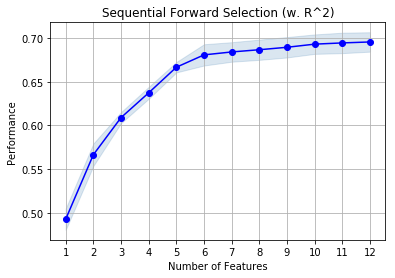

In [317]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [318]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6, 7, 8, 9, 11, 13, 14, 15]


In [319]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long']


# Build full model with selected features

In [320]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [321]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.698


In [322]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.699
